In [374]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from helpers.window import window_input_output

In [375]:
def train_linear_regression(df_in, apple_type):
    # select features
    df = df_in[[apple_type]]
    seq_df = window_input_output(26, 26, df)  # 26 weeks

    X_cols = [col for col in seq_df.columns if col.startswith('x')]
    X_cols.insert(0, apple_type)
    y_cols = [col for col in seq_df.columns if col.startswith('y')]

    X = seq_df[X_cols]
    y = seq_df[y_cols]

    # split & train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # score
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error ({apple_type}):", mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error ({apple_type}):", mae)
    print()
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (Test score) ({apple_type}):", r2)
    print(f"Train score ({apple_type}):", model.score(X_train, y_train)) 

    # trend visualization
    fig, ax = plt.subplots(figsize=(6, 4))

    ax.plot(np.arange(0, 26, 1), X_test.iloc[1, ], label='input')
    ax.plot(np.arange(26, 52, 1), y_test.iloc[1, ], label='actual', color='blue')
    ax.plot(np.arange(26, 52, 1), y_pred[0], label='predict', color='red', linestyle='--')

    ax.set_xlabel('timesteps')
    ax.set_ylabel('Quantity')
    plt.grid(True)
    plt.legend(loc=2)
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

    # Plotting linear regression
    for i, col in enumerate(y_test.columns):
        sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')

# Conventional

In [376]:
df_conventional = pd.read_csv('datasets/Conventional.csv')
df_conventional.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,117454,429518,5554
1,2015-01-11,110974,427723,5358
2,2015-01-18,151977,500684,4225
3,2015-01-25,140914,422435,4945
4,2015-02-01,217716,608156,5736


## Envi

Mean Squared Error (Envi): 17797903.56758869
Mean Absolute Error (Envi): 619.0859727011374

R-squared (Test score) (Envi): 0.981390222246662
Train score (Envi): 0.9806603366220514


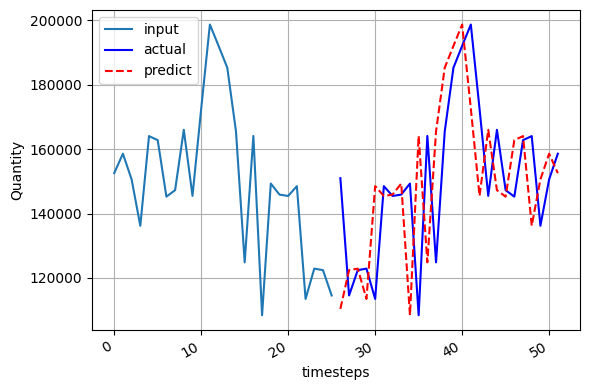

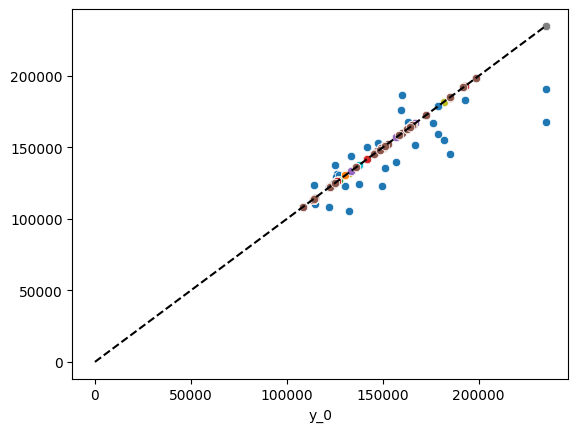

In [377]:
train_linear_regression(df_conventional, 'Envi')

## Fuji

Mean Squared Error (Fuji): 240793370.49958375
Mean Absolute Error (Fuji): 2515.96657772411

R-squared (Test score) (Fuji): 0.9555901538296907
Train score (Fuji): 0.9827648302658788


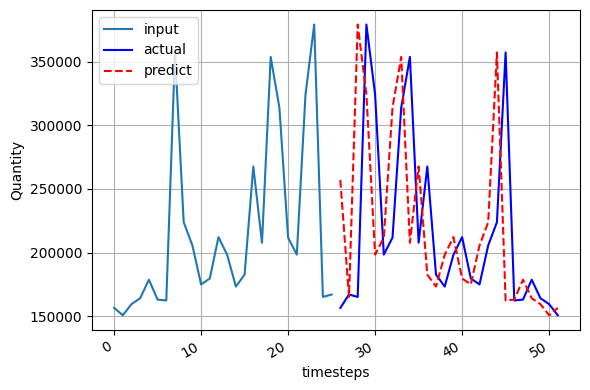

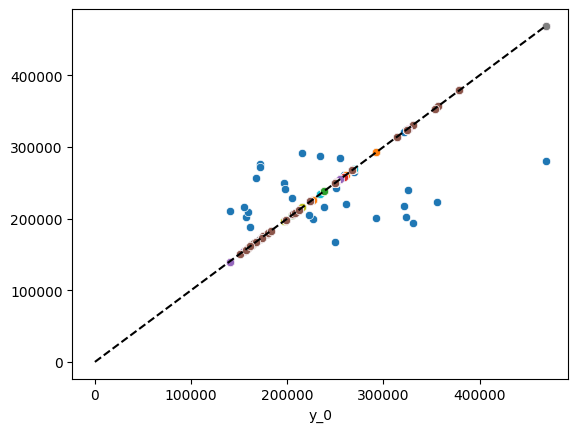

In [378]:
train_linear_regression(df_conventional, 'Fuji')

## Gala

Mean Squared Error (Gala): 1400234.6215781847
Mean Absolute Error (Gala): 179.69638222128472

R-squared (Test score) (Gala): 0.9449918179773261
Train score (Gala): 0.974205048595973


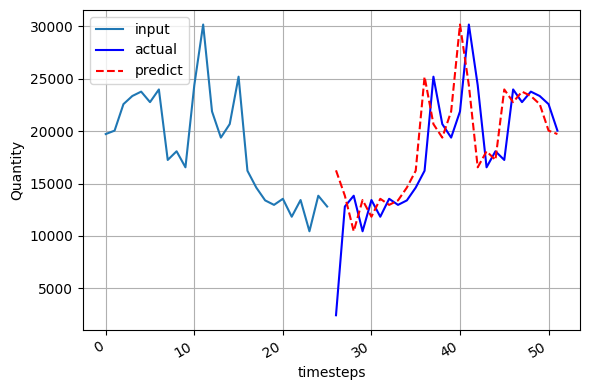

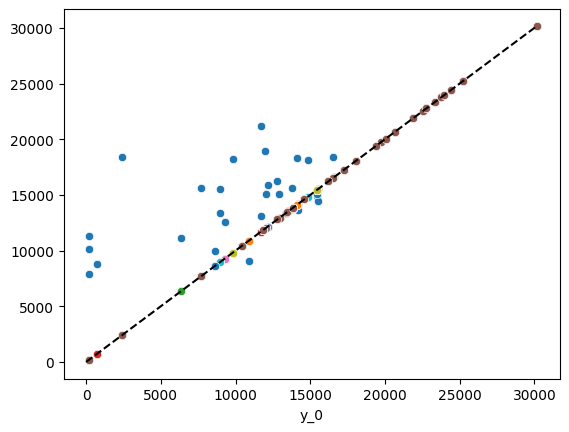

In [379]:
train_linear_regression(df_conventional, 'Gala') 

# Organic

In [380]:
df_organic = pd.read_csv('datasets/Organic.csv')
df_organic.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,3199,6917,8
1,2015-01-11,8856,15071,25
2,2015-01-18,5475,32539,42
3,2015-01-25,4271,8412,585
4,2015-02-01,4824,10710,104


## Envi

Mean Squared Error (Envi): 794246.1469094451
Mean Absolute Error (Envi): 159.2840477143138

R-squared (Test score) (Envi): 0.8168429153573407
Train score (Envi): 0.9758988182861074


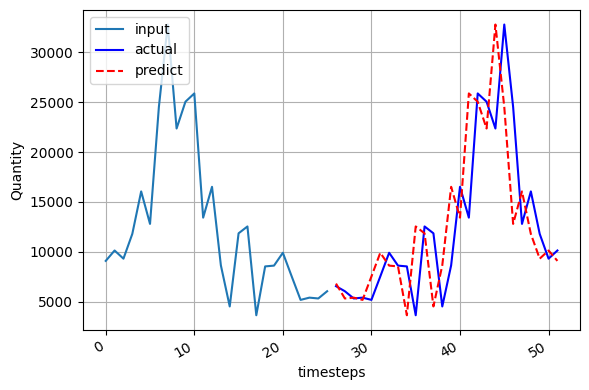

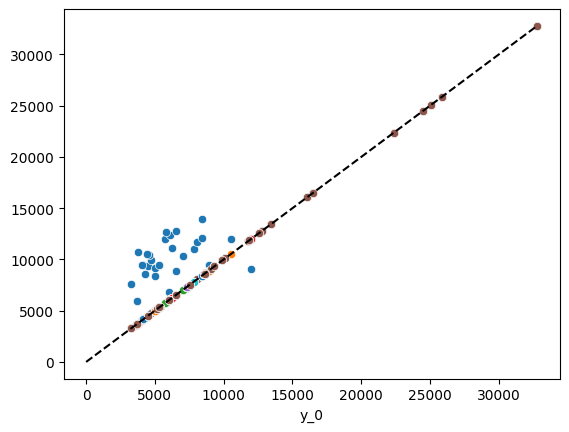

In [381]:
train_linear_regression(df_organic, 'Envi')

## Fuji

Mean Squared Error (Fuji): 62009.877606874536
Mean Absolute Error (Fuji): 43.31823722206539

R-squared (Test score) (Fuji): -0.49975158817096926
Train score (Fuji): 0.9805962215583949


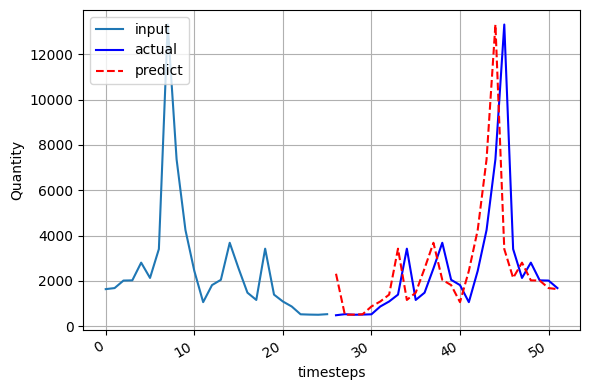

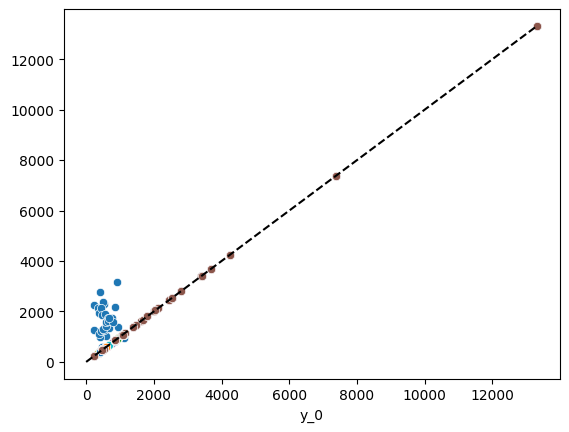

In [382]:
train_linear_regression(df_organic, 'Fuji')

## Gala

Mean Squared Error (Gala): 68.75633761879925
Mean Absolute Error (Gala): 1.1556503931256974

R-squared (Test score) (Gala): 0.8273681321206063
Train score (Gala): 0.9746710771345222


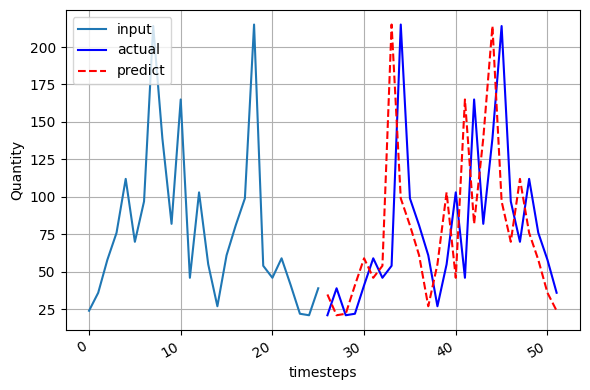

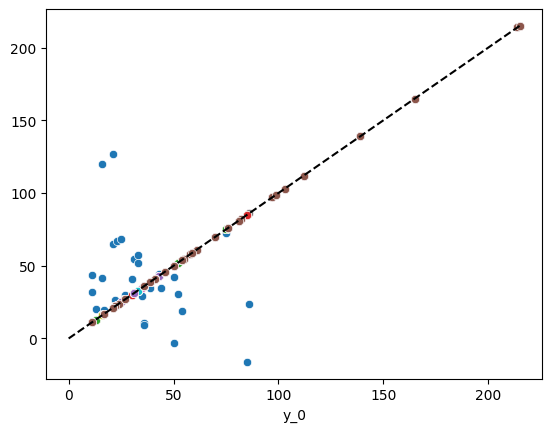

In [383]:
train_linear_regression(df_organic, 'Gala')